In [62]:
%matplotlib inline

In [63]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# jax.config.update("jax_enable_x64", True)

In [64]:
def V(x):
    return 0.25 * (x[0]**2 - 1)**2 + 3 * x[1]**2

In [65]:
N = 500
skip = 10 # plot vectors every skip points
# Create a 2D grid
lim = 2
x = jnp.linspace(-lim, lim, N)
y = jnp.linspace(-lim, lim, N)
X, Y = jnp.meshgrid(x, y)
grid_flat = jnp.stack([X.flatten(), Y.flatten()], axis=1)

V_vmap = jax.vmap(V)
V_vmap = jax.jit(V_vmap)
V = jax.jit(V)

# Calculate gradient using JAX for a single point
grad_V = lambda x: jax.grad(V)(x)
grad_V_vmap = jax.vmap(grad_V)
grad_V_vmap = jax.jit(grad_V_vmap)
grad_V = jax.jit(grad_V)


# Calculate the potential values
Z = V_vmap(grid_flat).reshape(N, N)

# Calculate the Hessian
V_hess = jax.hessian(V)
V_hess_vmap = jax.vmap(V_hess)
V_hess_vmap = jax.jit(V_hess_vmap)
V_hess = jax.jit(V_hess)




# Eigvec components

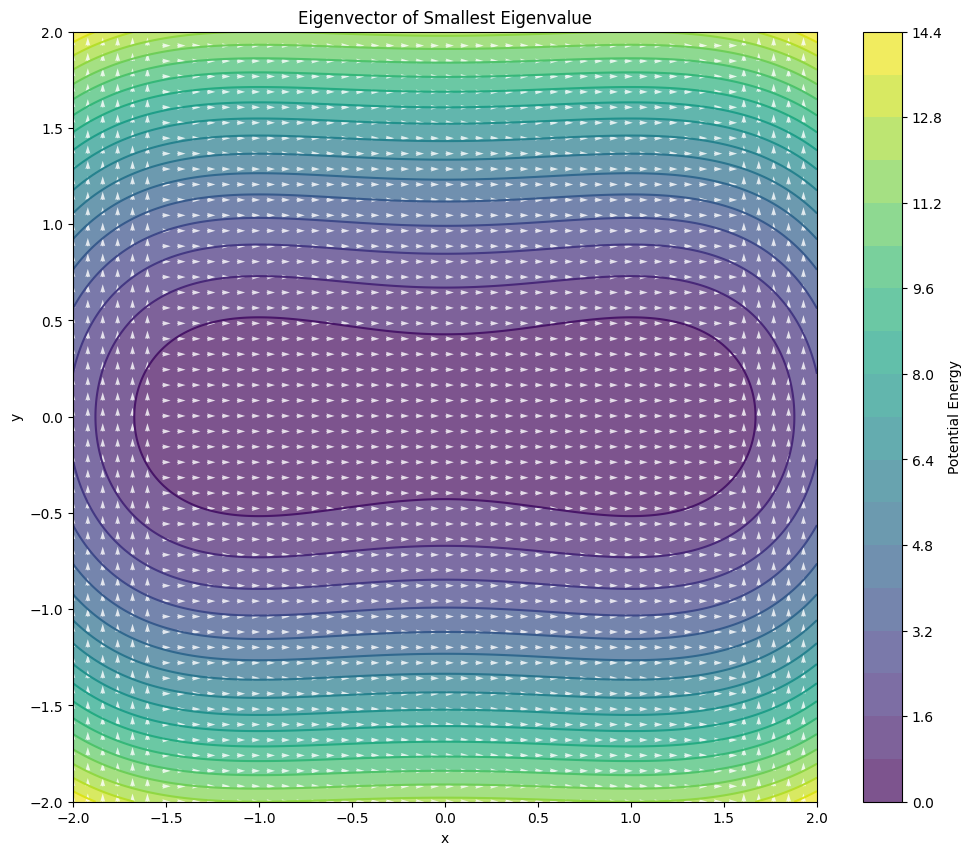

In [66]:
# Plot energy contour with quiver plot of the eigenvector of the smallest eigenvalue
plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface
plt.contour(X, Y, Z, levels=20)
plt.contourf(X, Y, Z, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

def get_smallest_hessian_eigvec(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    second_eigvec = eig_vecs[1]
    return smallest_eigvec
    

# Plot quiver of the eigenvector of the smallest eigenvalue
smallest_eigvec_vmap = jax.vmap(get_smallest_hessian_eigvec)
smallest_eigvec_grid = smallest_eigvec_vmap(grid_flat).reshape(N, N, 2)

plt.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
           smallest_eigvec_grid[::skip, ::skip, 0], smallest_eigvec_grid[::skip, ::skip, 1],
           color='white', alpha=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvector of Smallest Eigenvalue')
plt.show()


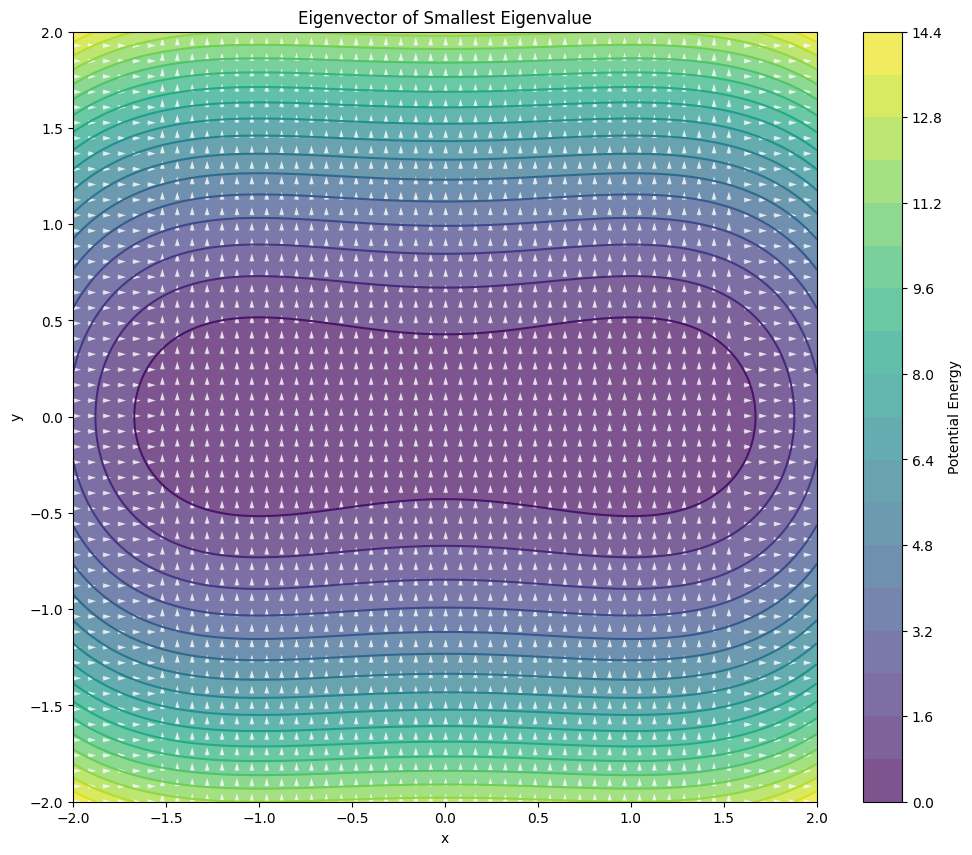

In [67]:
# Plot energy contour with quiver plot of the eigenvector of the second smallest eigenvalue
plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface
plt.contour(X, Y, Z, levels=20)
plt.contourf(X, Y, Z, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

def get_second_smallest_hessian_eigvec(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    second_eigvec = eig_vecs[1]
    return second_eigvec
    

# Plot quiver of the eigenvector of the smallest eigenvalue
second_smallest_eigvec_vmap = jax.vmap(get_second_smallest_hessian_eigvec)
second_smallest_eigvec_grid = second_smallest_eigvec_vmap(grid_flat).reshape(N, N, 2)

plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    second_smallest_eigvec_grid[::skip, ::skip, 0], second_smallest_eigvec_grid[::skip, ::skip, 1],
    color='white', alpha=0.8
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvector of Smallest Eigenvalue')
plt.show()


### Gradient

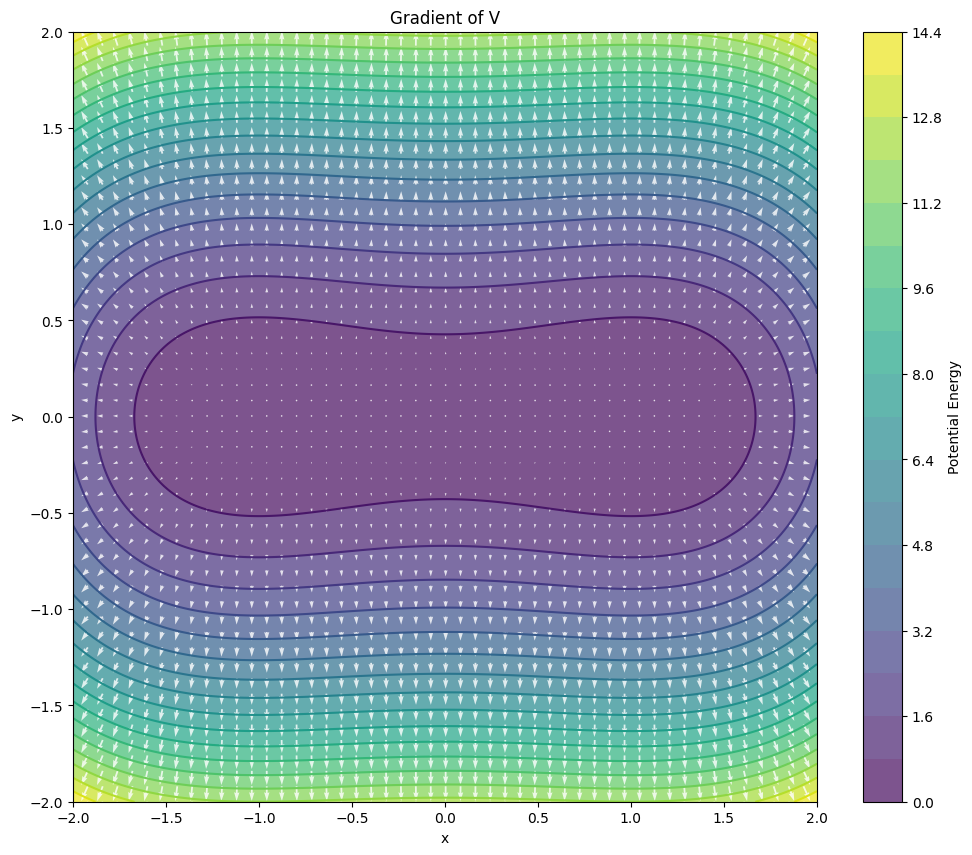

In [68]:
# Plot the gradient of V
plt.close()
plt.figure(figsize=(12, 10))

# Compute the gradient of V on the grid
grad_V_vmap = jax.vmap(jax.grad(V))
grad_V_grid = grad_V_vmap(grid_flat).reshape(N, N, 2)

# Plot potential surface
plt.contour(X, Y, Z, levels=20)
plt.contourf(X, Y, Z, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

# Plot quiver of the gradient of V
plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    grad_V_grid[::skip, ::skip, 0], grad_V_grid[::skip, ::skip, 1],
    color='white', alpha=0.8
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient of V')
plt.show()


### Gradient of V projected on eigenvector

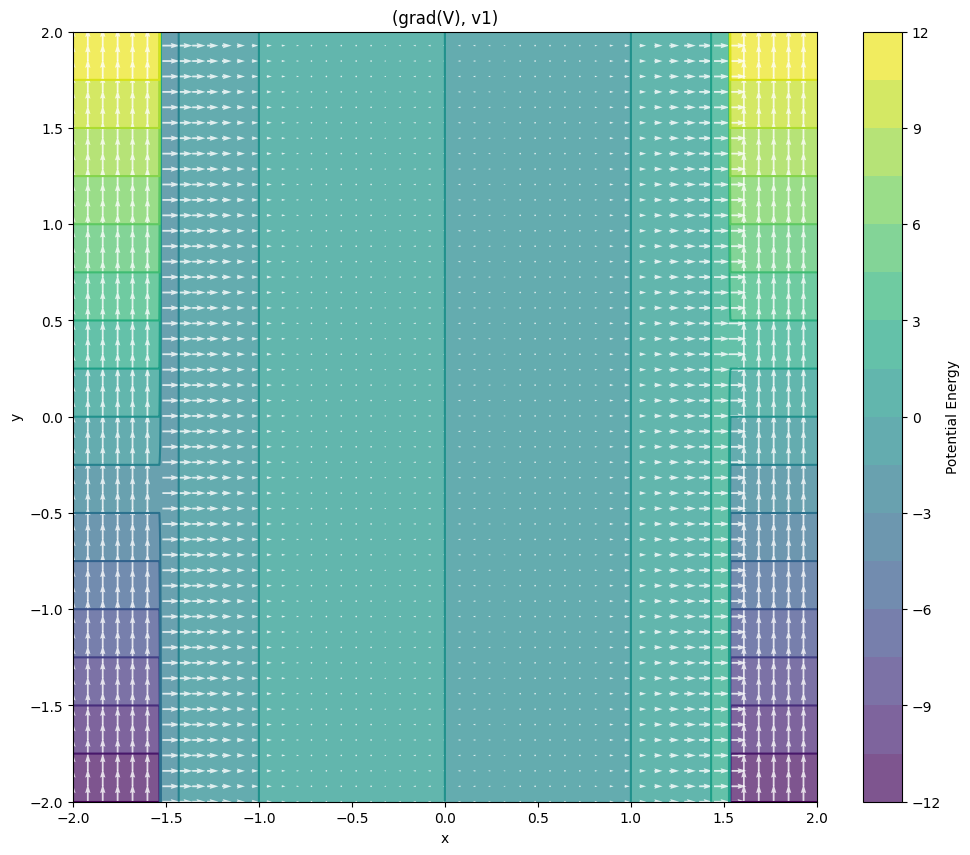

In [69]:

def V_pseudo(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    second_eigvec = eig_vecs[1]
    g = jnp.dot(grad_x, smallest_eigvec)
    return g
    

v_pseudo_vmap = jax.vmap(V_pseudo)
v_pseudo_grid = v_pseudo_vmap(grid_flat).reshape(N, N)

plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface energy contour
plt.contour(X, Y, v_pseudo_grid, levels=20)
plt.contourf(X, Y, v_pseudo_grid, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

v_pseudo_grad_grid = jax.vmap(jax.grad(V_pseudo))(grid_flat).reshape(N, N, 2)

plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    v_pseudo_grad_grid[::skip, ::skip, 0], v_pseudo_grad_grid[::skip, ::skip, 1],
    color='white', alpha=0.8
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('(grad(V), v1)')
plt.show()


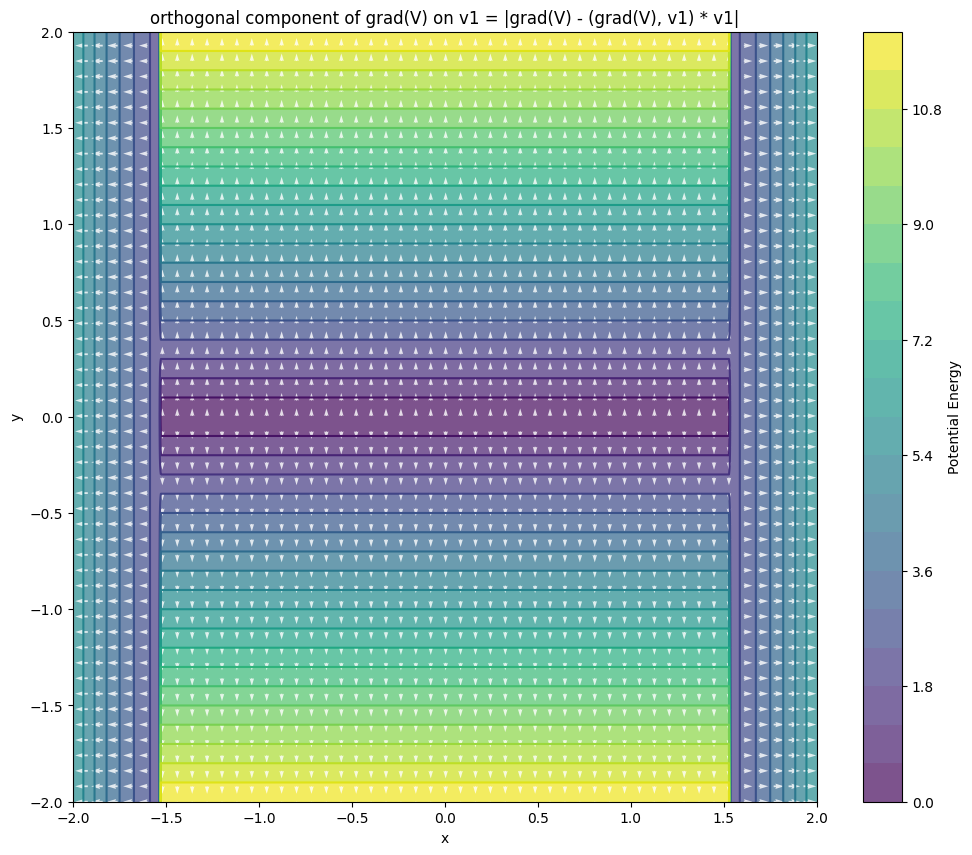

In [70]:

def V_pseudo(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    # smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    # second_eigvec = eig_vecs[1]
    projection = jnp.dot(grad_x, smallest_eigvec) * smallest_eigvec
    orthogonal_component = grad_x - projection
    return jnp.linalg.norm(orthogonal_component)
    

v_pseudo_vmap = jax.vmap(V_pseudo)
v_pseudo_grid = v_pseudo_vmap(grid_flat).reshape(N, N)

plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface energy contour
plt.contour(X, Y, v_pseudo_grid, levels=20)
plt.contourf(X, Y, v_pseudo_grid, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

v_pseudo_grad_grid = jax.vmap(jax.grad(V_pseudo))(grid_flat).reshape(N, N, 2)

plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    v_pseudo_grad_grid[::skip, ::skip, 0], v_pseudo_grad_grid[::skip, ::skip, 1],
    color='white', alpha=0.8
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('orthogonal component of grad(V) on v1 = |grad(V) - (grad(V), v1) * v1|')
plt.show()


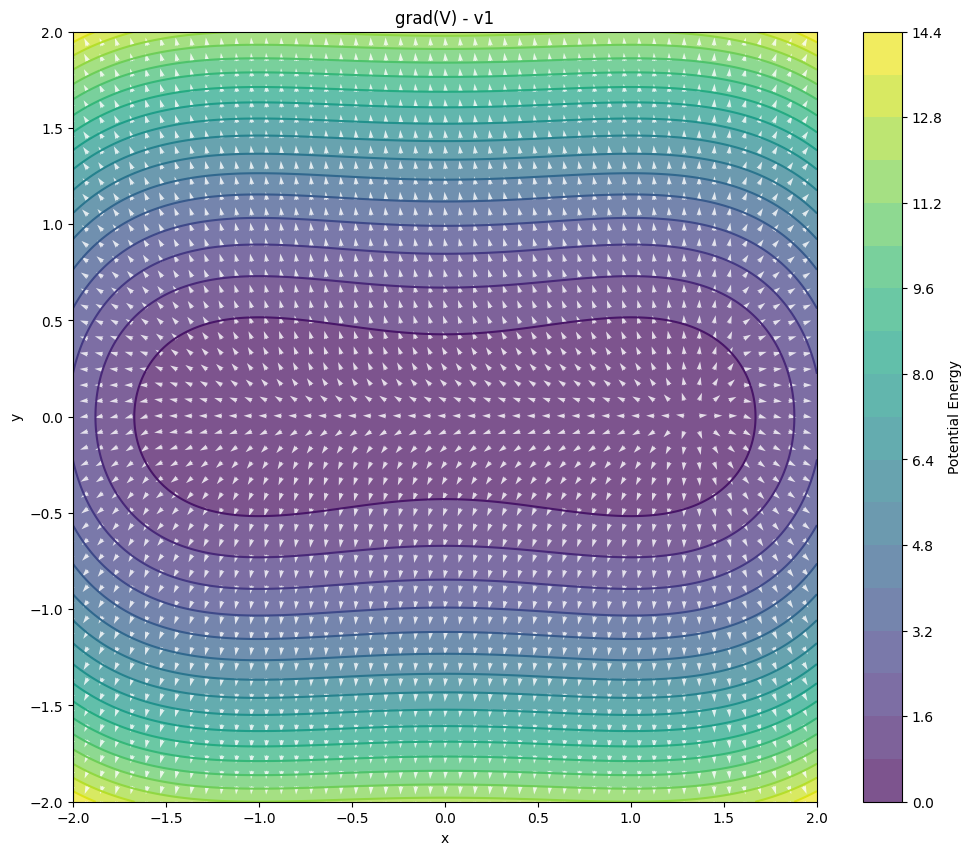

In [71]:
plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface
plt.contour(X, Y, Z, levels=20)
plt.contourf(X, Y, Z, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

def vectorfield(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    second_eigvec = eig_vecs[1]
    g = grad_x - smallest_eigvec
    g = g / jnp.linalg.norm(g)
    return g
    

# Plot quiver of the eigenvector of the smallest eigenvalue
vf_vmap = jax.vmap(vectorfield)
vf_grid = vf_vmap(grid_flat).reshape(N, N, 2)

plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    vf_grid[::skip, ::skip, 0], vf_grid[::skip, ::skip, 1],
    color='white', alpha=0.8
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('grad(V) - v1')
plt.show()


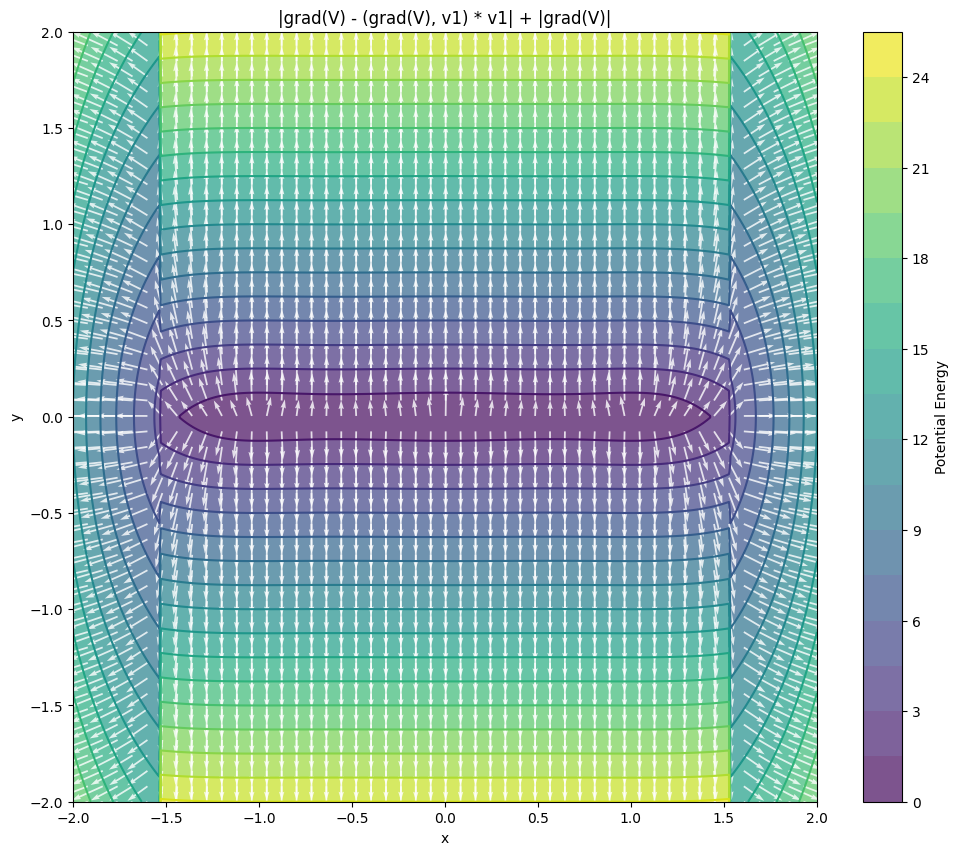

In [85]:

def V_pseudo(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    # second_eigvec = eig_vecs[1]
    projection = jnp.dot(grad_x, smallest_eigvec) * smallest_eigvec
    orthogonal_component = grad_x - projection
    g = jnp.linalg.norm(orthogonal_component) + jnp.linalg.norm(grad_x)
    return g
    # eigval_term = - eig_vals[0] * eig_vals[1]  
    # return jax.lax.cond(eigval_term > 0, lambda: g, lambda: eigval_term) 

    

v_pseudo_vmap = jax.vmap(V_pseudo)
v_pseudo_grid = v_pseudo_vmap(grid_flat).reshape(N, N)

plt.close()
plt.figure(figsize=(12, 10))

# Plot potential surface energy contour
plt.contour(X, Y, v_pseudo_grid, levels=20)
plt.contourf(X, Y, v_pseudo_grid, levels=20, alpha=0.7)
plt.colorbar(label='Potential Energy')

v_pseudo_grad_grid = jax.vmap(jax.grad(V_pseudo))(grid_flat).reshape(N, N, 2)

plt.quiver(
    X[::skip, ::skip], Y[::skip, ::skip], 
    v_pseudo_grad_grid[::skip, ::skip, 0], v_pseudo_grad_grid[::skip, ::skip, 1],
    color='white', alpha=0.8,
    scale=300,
)

plt.xlabel('x')
plt.ylabel('y')
plt.title('|grad(V) - (grad(V), v1) * v1| + |grad(V)|')
plt.show()


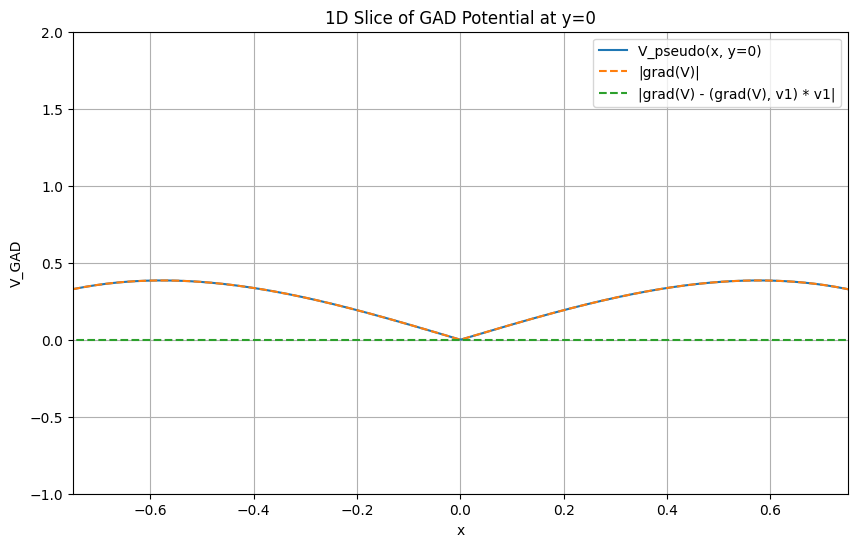

In [78]:
# Create x values for the 1D slice
x_1d = jnp.linspace(-lim, lim, 1000)
# Create points with y = 0
# points = jnp.stack([x_1d, jnp.zeros_like(x_1d) + 1], axis=1)
points = jnp.stack([x_1d, jnp.zeros_like(x_1d)], axis=1)

# Calculate potential values
v_gad_1d = v_pseudo_vmap(points)
# v_gad_1d = V_vmap(points)
# Plot the 1D slice
plt.close()
plt.figure(figsize=(10, 6))
plt.plot(x_1d, v_gad_1d, label='V_pseudo(x, y=0)', )

def grad_norm(x):
    grad_x = grad_V(x)
    return jnp.linalg.norm(grad_x)
grad_norm_grid = jax.vmap(grad_norm)(points)
plt.plot(x_1d, grad_norm_grid, label='|grad(V)|', ls='--')

def orthogonal_component(x):
    grad_x = grad_V(x)
    H = V_hess(x)
    eig_vals, eig_vecs = jnp.linalg.eigh(H)
    smallest_eigval = eig_vals[0]
    smallest_eigvec = eig_vecs[0]
    projection = jnp.dot(grad_x, smallest_eigvec) * smallest_eigvec
    orthogonal_component = grad_x - projection
    return jnp.linalg.norm(orthogonal_component)
orthogonal_component_grid = jax.vmap(orthogonal_component)(points)
plt.plot(x_1d, orthogonal_component_grid, label='|grad(V) - (grad(V), v1) * v1|', ls='--')

# def eigvalprod(x):
#     grad_x = grad_V(x)
#     H = V_hess(x)
#     eig_vals, eig_vecs = jnp.linalg.eigh(H)
#     smallest_eigval = eig_vals[0]
#     return - eig_vals[0] * eig_vals[1]  
# eigvalprod_vmap = jax.vmap(eigvalprod)
# eigvalprod_grid = eigvalprod_vmap(points)
# plt.plot(x_1d, eigvalprod_grid, 'r-', label='Eigvalprod(x, y=0)')


plt.grid(True)
plt.xlabel('x')
plt.ylabel('V_GAD')
plt.title('1D Slice of GAD Potential at y=0')
plt.legend()
plt.xlim(-0.75, 0.75)
plt.ylim(-1, 2)
plt.show()